0.13313695546412885
0.13313695544523307
0.133136955256279
0.13313695336712172
0.13313693451387323
0.13313674980800655
0.1331352796803957
0.13315320365470878


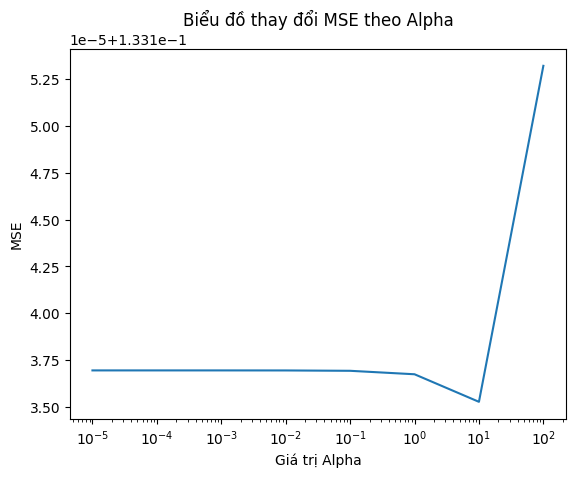

In [87]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('Churn_Modelling.csv', nrows= 10000)

# Biến 2 trường 'Geography', 'Gender' thành biến giả
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Tạo thêm đặc trưng BalanceSalaryRatio
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Thay thế hoặc loại bỏ các giá trị có vấn đề
df = df.replace("P'an", np.nan)  # Thay thế các giá trị P'an thành NaN

# Loại bỏ các hàng chứa giá trị NaN
df = df.dropna()


# Loại bỏ cột không cần thiết
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

# Chia tập dữ liệu
X = df.drop('Exited', axis=1)  # 'Exited' là giá trị cần dự đoán
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha_list = [0.00001,0.0001, 0.001,0.01, 0.1, 1, 10, 100]

# Danh sách để lưu trữ các giá trị MSE
mse_list = []

# Vòng lặp qua các giá trị alpha
for alpha in alpha_list:
    # Tạo mô hình và huấn luyện
    model = Ridge(alpha = alpha)  # Thay đổi alpha cho từng lần lặp
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Tính toán MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
for i in mse_list:
    print(i)
# Vẽ biểu đồ
plt.plot(alpha_list, mse_list)
plt.xlabel('Giá trị Alpha')
plt.ylabel('MSE')
plt.title('Biểu đồ thay đổi MSE theo Alpha')
plt.xscale('log')  # Thang logarit cho trục x (nếu cần)
plt.show()

In [88]:
# Huấn luyện với mô hình hồi quy tuyến tính
lr = LinearRegression()
lr.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lr = lr.predict(X_test)


# Chuyển đổi các giá trị liên tục thành các giá trị nhị phân cho phân loại
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_lr]

# Đánh giá mô hình
accuracy_lr = accuracy_score(y_test, y_pred_binary)
precision_lr = precision_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')


Accuracy: 0.8214107053526764
Precision: 0.6818181818181818
